In [49]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

In [50]:
prev_application = pd.read_csv('Behavioural_Modelling_Data.csv')
prev_application.head()

,SK_ID_CURR,TARGET,total_loans_applied,total_loan_approved,total_loan_rejected,nbr_cash_loans,nbr_consumer_loans,nbr_revolving_loans,nbr_live_loans,nbr_closed_loans,nbr_loan_with_downpayment,avg_percentage_downpayment,nbr_loan_rejection_HC,nbr_loan_rejection_LIMIT,nbr_loan_rejection_SCO,nbr_loan_cross_sell,nbr_loan_walkin,nbr_loan_channel_cc_office,nbr_loan_channel_cntry_wide,nbr_loan_channel_stone_regional,nbr_loan_high_yeild,nbr_loan_meddle_yeild,nbr_loan_low_yeild,nbr_loan_POS_with_interset,nbr_loan_POS_without_interset,NFLAG_INSURED_ON_APPROVAL,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_POS,SK_DPD_DEF_POS,NBR_OF_DPD,NBR_OF_DPD_DEF,TOTAL_DRAWINGS_ATM_CURRENT,TOTAL_DRAWINGS_CURRENT,TOTAL_DRAWINGS_OTHER_CURRENT,TOTAL_DRAWINGS_POS_CURRENT,TOTAL_SK_DPD,TOTAL_DPD_DEF,cnt_on_time_payment,cnt_on_delay_payment,cnt_partial_payment,cnt_full_payment,AMT_ANNUITY_LIVE,AMT_APPLICATION_LIVE,AMT_CREDIT_LIVE,AMT_GOODS_PRICE_LIVE,AMT_BALANCE_LIVE,AMT_CREDIT_LIMIT_ACTUAL_LIVE,AMT_DRAWINGS_ATM_CURRENT_LIVE,AMT_DRAWINGS_CURRENT_LIVE,AMT_DRAWINGS_OTHER_CURRENT_LIVE,AMT_DRAWINGS_POS_CURRENT_LIVE,AMT_INST_MIN_REGULARITY_LIVE,AMT_RECEIVABLE_PRINCIPAL_LIVE,AVG_AMT_BALANCE,AVG_AMT_CREDIT_LIMIT_ACTUAL,AVG_AMT_DRAWINGS_ATM_CURRENT,AVG_AMT_DRAWINGS_CURRENT,AVG_AMT_DRAWINGS_OTHER_CURRENT,AVG_AMT_DRAWINGS_POS_CURRENT,AVG_AMT_INST_MIN_REGULARITY,AVG_AMT_PAYMENT_CURRENT,AVG_AMT_PAYMENT_TOTAL_CURRENT,AVG_AMT_RECEIVABLE_PRINCIPAL,AVG_AMT_RECIVABLE,AVG_INSTALLMENT_AMOUNT
0,100002,1,1,1,0,0,1,0,1,1,0,NaN,0,0,0,0,0,0,0,1,0,0,1,1,0,0.0,24.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,19.0,9251.775,179055.00,179055.00,179055.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11559.247105
1,100003,0,3,3,0,1,2,0,1,3,1,0.100061,0,0,0,1,0,1,1,1,2,0,1,2,0,2.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0,56553.990,435436.50,484191.00,435436.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78558.479286
2,100004,0,1,1,0,0,1,0,0,1,1,0.212008,0,0,0,0,0,0,0,1,1,0,0,0,1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,5357.250,24282.00,20106.00,24282.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7096.155000
3,100006,0,9,5,4,5,2,2,2,9,2,0.163412,0,1,0,4,0,7,1,1,1,2,2,2,0,0.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,16.0,23651.175,272203.26,291695.50,408304.89,0.0,270000.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,270000.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,241944.225000
4,100007,0,6,6,0,4,2,0,2,6,2,0.159516,0,0,0,3,1,1,3,1,3,3,0,2,0,3.0,75.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,16.0,0.0,63.0,12278.805,150530.25,166638.75,150530.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12123.039609


In [51]:
prev_application.shape

(290910, 66)

In [52]:
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(prev_application)

,Total,Percent
AVG_AMT_PAYMENT_CURRENT,238068,81.835619
AMT_DRAWINGS_OTHER_CURRENT_LIVE,237980,81.805369
AMT_DRAWINGS_ATM_CURRENT_LIVE,237980,81.805369
AVG_AMT_DRAWINGS_POS_CURRENT,237980,81.805369
AVG_AMT_DRAWINGS_OTHER_CURRENT,237980,81.805369
AVG_AMT_DRAWINGS_ATM_CURRENT,237980,81.805369
AMT_DRAWINGS_POS_CURRENT_LIVE,237980,81.805369
AMT_RECEIVABLE_PRINCIPAL_LIVE,212976,73.210271
AMT_BALANCE_LIVE,212976,73.210271
AMT_CREDIT_LIMIT_ACTUAL_LIVE,212976,73.210271


In [53]:
def print_crosstab(df,column_name):
    cross_tab = pd.crosstab(df[column_name], df['TARGET'],margins=True, margins_name="Total")
    cross_tab_df = pd.DataFrame(cross_tab)
    cross_tab_df["Default %"] = (100*cross_tab_df[1]/cross_tab_df['Total']).round(3)
    cross_tab_df["Default %- Overall"] = (100*cross_tab_df[1]/cross_tab_df[1]['Total']).round(3)
    cross_tab_df["Population %- Overall"] = (100*cross_tab_df['Total']/cross_tab_df['Total']['Total']).round(3)
    
    return cross_tab_df

In [54]:
prev_application = prev_application.fillna(0)

In [55]:
# TOTAL LIVE LOANS AND AMOUT & WITHDRAING
live_columns = [col for col in prev_application.columns if "_live" in col.lower()]
live_columns

['nbr_live_loans',
 'AMT_ANNUITY_LIVE',
 'AMT_APPLICATION_LIVE',
 'AMT_CREDIT_LIVE',
 'AMT_GOODS_PRICE_LIVE',
 'AMT_BALANCE_LIVE',
 'AMT_CREDIT_LIMIT_ACTUAL_LIVE',
 'AMT_DRAWINGS_ATM_CURRENT_LIVE',
 'AMT_DRAWINGS_CURRENT_LIVE',
 'AMT_DRAWINGS_OTHER_CURRENT_LIVE',
 'AMT_DRAWINGS_POS_CURRENT_LIVE',
 'AMT_INST_MIN_REGULARITY_LIVE',
 'AMT_RECEIVABLE_PRINCIPAL_LIVE']

In [56]:
prev_application[live_columns].head()

,nbr_live_loans,AMT_ANNUITY_LIVE,AMT_APPLICATION_LIVE,AMT_CREDIT_LIVE,AMT_GOODS_PRICE_LIVE,AMT_BALANCE_LIVE,AMT_CREDIT_LIMIT_ACTUAL_LIVE,AMT_DRAWINGS_ATM_CURRENT_LIVE,AMT_DRAWINGS_CURRENT_LIVE,AMT_DRAWINGS_OTHER_CURRENT_LIVE,AMT_DRAWINGS_POS_CURRENT_LIVE,AMT_INST_MIN_REGULARITY_LIVE,AMT_RECEIVABLE_PRINCIPAL_LIVE
0,1,9251.775,179055.00,179055.00,179055.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,56553.990,435436.50,484191.00,435436.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,5357.250,24282.00,20106.00,24282.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,23651.175,272203.26,291695.50,408304.89,0.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,12278.805,150530.25,166638.75,150530.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
def outlier_clipping(df, col):
    Q1 = df[col].quantile(.25)
    Q2 = df[col].quantile(.5)
    Q3 = df[col].quantile(.75)

  
    IQR = Q3 - Q1  
    #print('Interquartile range is', IQR)
    low_lim = Q1 - 1.5 * IQR 
    up_lim = Q3 + 1.5 * IQR
    #print('Interquartile range is', low_lim, up_lim)
    
    df[col] = df[col].clip(low_lim,up_lim)
    return df


In [58]:
prev_application["TARGET"].value_counts()

0    267076
1     23834
Name: TARGET, dtype: int64

In [59]:
print_crosstab(prev_application,"nbr_live_loans")

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
nbr_live_loans,,,,,,
0,96907,9035,105942,8.528,37.908,36.417
1,108617,9742,118359,8.231,40.874,40.686
2,46610,3873,50483,7.672,16.250,17.353
3,12153,949,13102,7.243,3.982,4.504
4,2316,195,2511,7.766,0.818,0.863
5,396,36,432,8.333,0.151,0.148
6,63,3,66,4.545,0.013,0.023
7,12,1,13,7.692,0.004,0.004
8,2,0,2,0.000,0.000,0.001


In [60]:
# AMT_ANNUITY has outlier lets clip the values to the 95 percentile
#for column in prev_application[live_columns].columns:
 #   prev_application = outlier_clipping(prev_application, column)

<AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY_LIVE'>

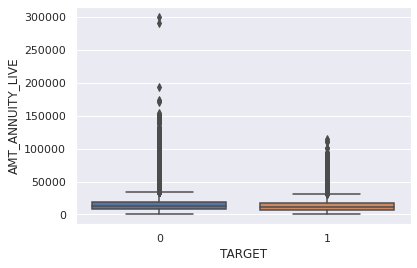

In [61]:
#plt.figure(figsize=)
sns.boxplot(y=prev_application["AMT_ANNUITY_LIVE"], x= prev_application["TARGET"])

<AxesSubplot:>

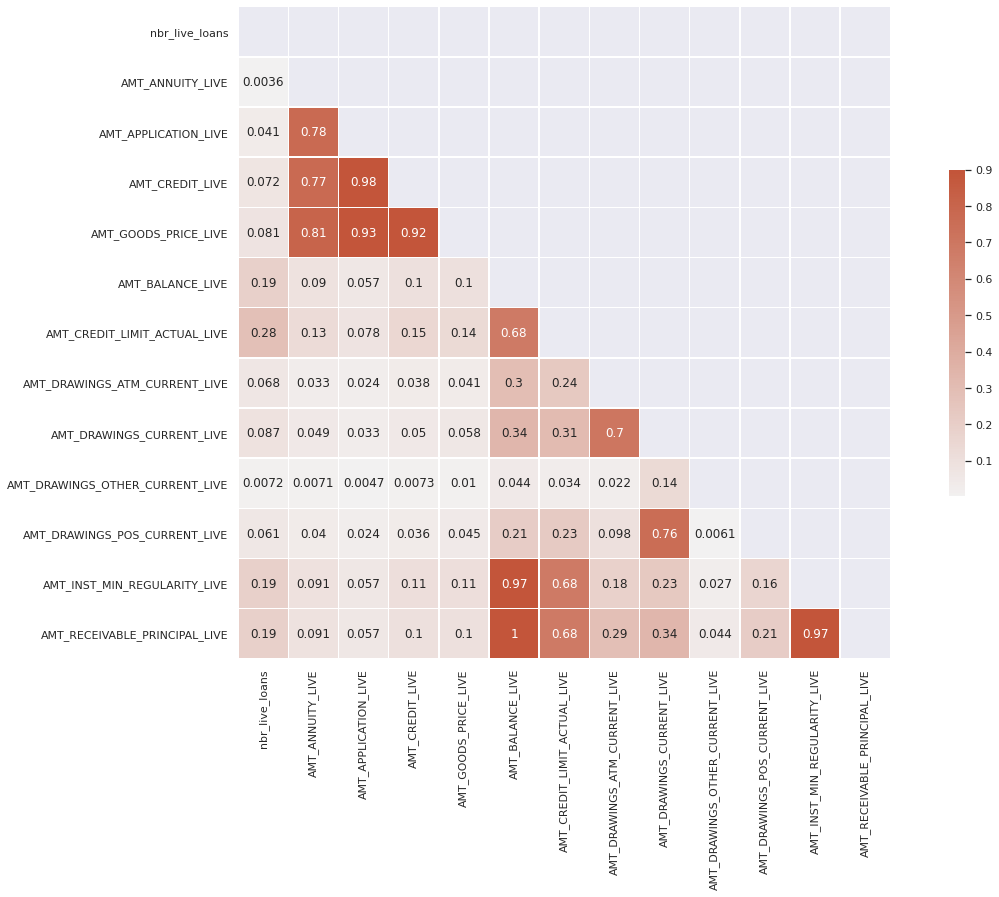

In [62]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application[live_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)


In [63]:
# Drop variable high correlation and 0 correaltion 
drop_variabls = [
 'AMT_DRAWINGS_ATM_CURRENT_LIVE',
 'AMT_DRAWINGS_CURRENT_LIVE',
 'AMT_DRAWINGS_OTHER_CURRENT_LIVE',
 'AMT_DRAWINGS_POS_CURRENT_LIVE',
 'AMT_RECEIVABLE_PRINCIPAL_LIVE',
    'AMT_CREDIT_LIVE',
    'AMT_GOODS_PRICE_LIVE',
    "AMT_INST_MIN_REGULARITY_LIVE",
    "AMT_ANNUITY_LIVE",
    "AMT_APPLICATION_LIVE",
    "AMT_CREDIT_LIMIT_ACTUAL_LIVE"
    
    
 ]
prev_application = prev_application.drop(drop_variabls, axis=1)

In [64]:
# TOTAL LIVE LOANS AND AMOUT & WITHDRAING
live_columns = [col for col in prev_application.columns if "_live" in col.lower()]
live_columns.append("TARGET")
live_columns

['nbr_live_loans', 'AMT_BALANCE_LIVE', 'TARGET']

<AxesSubplot:>

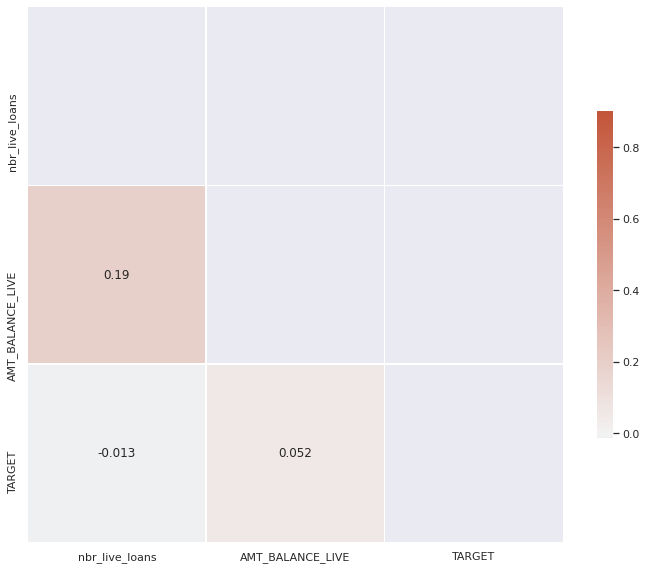

In [65]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application[live_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)


In [66]:
prev_application["RATIO_TOTAL_APPROVED_REJECTED"] = prev_application.apply(lambda x: round(x['total_loan_rejected']/x["total_loan_approved"],3), axis=1)
prev_application["RATIO_TOTAL_DPDS"] = prev_application.apply(lambda x: round(x["TOTAL_SK_DPD"]+x['TOTAL_DPD_DEF'],3), axis=1)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [67]:
drop_variable = ['TOTAL_DRAWINGS_POS_CURRENT', 'total_loans_applied', 
                 'TOTAL_DRAWINGS_CURRENT', 'total_loan_approved'
                ,'total_loan_rejected', "TOTAL_SK_DPD", "TOTAL_DPD_DEF"]
prev_application = prev_application.drop(drop_variable, axis=1)

In [68]:
total_count_variable = [col for col in prev_application.columns if "total" in col.lower()]
total_count_variable.append("TARGET")
total_count_variable

['TOTAL_DRAWINGS_ATM_CURRENT',
 'TOTAL_DRAWINGS_OTHER_CURRENT',
 'AVG_AMT_PAYMENT_TOTAL_CURRENT',
 'RATIO_TOTAL_APPROVED_REJECTED',
 'RATIO_TOTAL_DPDS',
 'TARGET']

<AxesSubplot:>

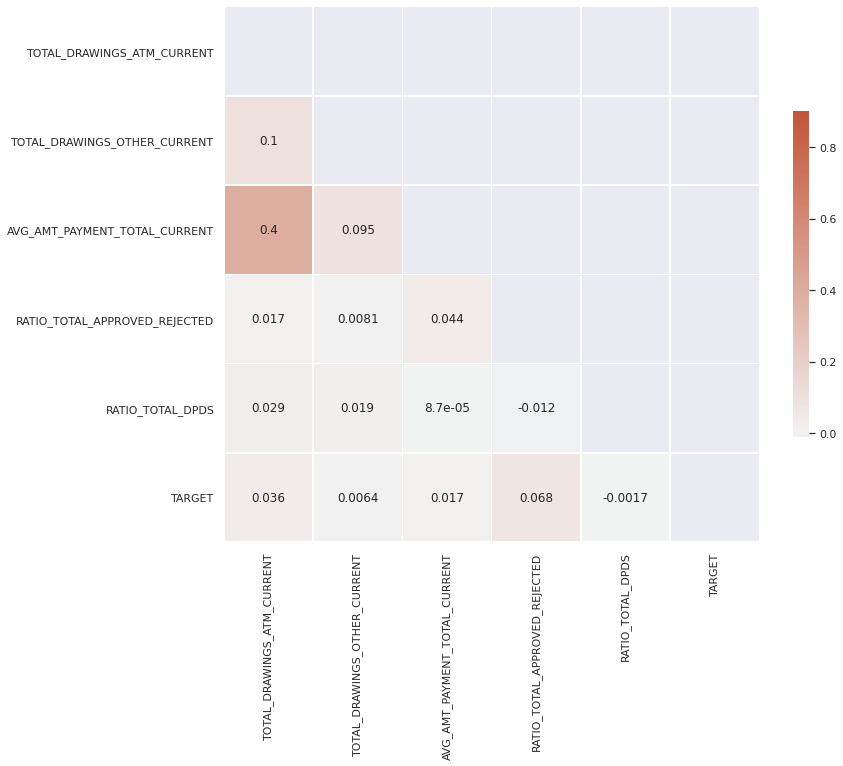

In [69]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application[total_count_variable].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [70]:
prev_application.shape

(290910, 50)

In [71]:
total_nbr_variable = [col for col in prev_application.columns if "nbr" in col.lower()]
total_nbr_variable.append("TARGET")
total_nbr_variable

['nbr_cash_loans',
 'nbr_consumer_loans',
 'nbr_revolving_loans',
 'nbr_live_loans',
 'nbr_closed_loans',
 'nbr_loan_with_downpayment',
 'nbr_loan_rejection_HC',
 'nbr_loan_rejection_LIMIT',
 'nbr_loan_rejection_SCO',
 'nbr_loan_cross_sell',
 'nbr_loan_walkin',
 'nbr_loan_channel_cc_office',
 'nbr_loan_channel_cntry_wide',
 'nbr_loan_channel_stone_regional',
 'nbr_loan_high_yeild',
 'nbr_loan_meddle_yeild',
 'nbr_loan_low_yeild',
 'nbr_loan_POS_with_interset',
 'nbr_loan_POS_without_interset',
 'NBR_OF_DPD',
 'NBR_OF_DPD_DEF',
 'TARGET']

<AxesSubplot:>

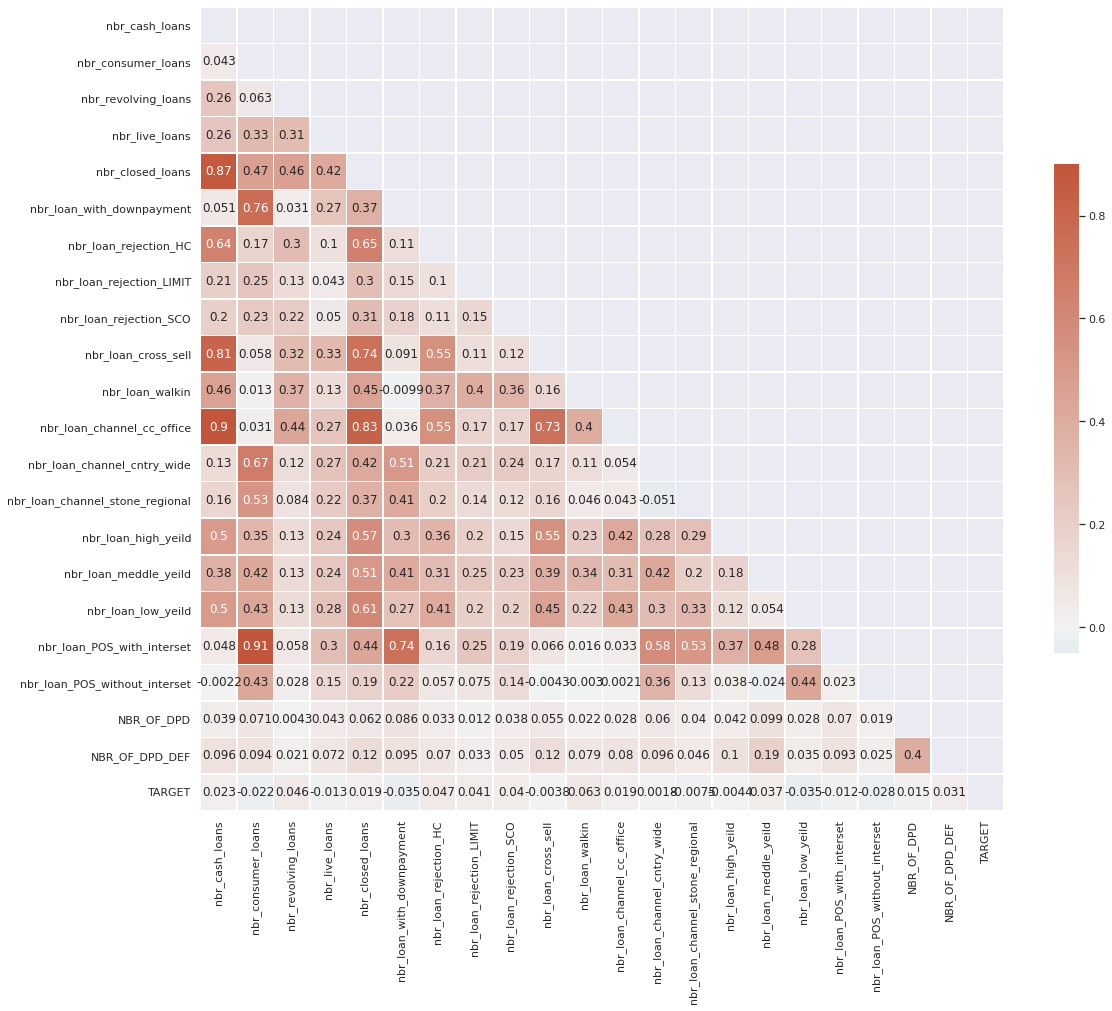

In [72]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application[total_nbr_variable].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [73]:
prev_application["RATIO_NBR_POS_WITH_INT_CONSUMER"] = prev_application.apply(lambda x: round(x["nbr_loan_POS_with_interset"]/x['nbr_consumer_loans'],3), axis=1)
prev_application["RATIO_NBR_POS_WITHOUT_INT_CONSUMER"] = prev_application.apply(lambda x: round(x['nbr_loan_POS_without_interset']/x["nbr_consumer_loans"],3), axis=1)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [74]:
prev_application["RATIO_NBR_LIVE_CLOSED"] = prev_application.apply(lambda x: round(x['nbr_live_loans']/x["nbr_closed_loans"],3), axis=1)

In [75]:
def get_ratio_value(x):
    if x["nbr_loan_channel_cc_office"] is None and x["nbr_loan_cross_sell"] >0:
        return 1
    elif x["nbr_loan_cross_sell"] == 0:
        return 0
    else:
        return round(x["nbr_loan_cross_sell"]/x["nbr_loan_channel_cc_office"],3)
        
        

In [76]:
prev_application["RATIO_NBR_XSell_CC_Channel"] = prev_application.apply(lambda x: get_ratio_value(x), axis=1)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [77]:
prev_application = prev_application.drop(["nbr_loan_POS_with_interset", "nbr_loan_POS_without_interset", 
                                          "nbr_consumer_loans", "nbr_closed_loans", "nbr_live_loans",
                                         "nbr_loan_cross_sell", "nbr_loan_channel_cc_office"],axis=1)

In [78]:
prev_application = prev_application.drop(["RATIO_NBR_POS_WITHOUT_INT_CONSUMER"], axis=1)

In [79]:
total_nbr_variable = [col for col in prev_application.columns if "nbr" in col.lower()]
total_nbr_variable.append("TARGET")
total_nbr_variable

['nbr_cash_loans',
 'nbr_revolving_loans',
 'nbr_loan_with_downpayment',
 'nbr_loan_rejection_HC',
 'nbr_loan_rejection_LIMIT',
 'nbr_loan_rejection_SCO',
 'nbr_loan_walkin',
 'nbr_loan_channel_cntry_wide',
 'nbr_loan_channel_stone_regional',
 'nbr_loan_high_yeild',
 'nbr_loan_meddle_yeild',
 'nbr_loan_low_yeild',
 'NBR_OF_DPD',
 'NBR_OF_DPD_DEF',
 'RATIO_NBR_POS_WITH_INT_CONSUMER',
 'RATIO_NBR_LIVE_CLOSED',
 'RATIO_NBR_XSell_CC_Channel',
 'TARGET']

<AxesSubplot:>

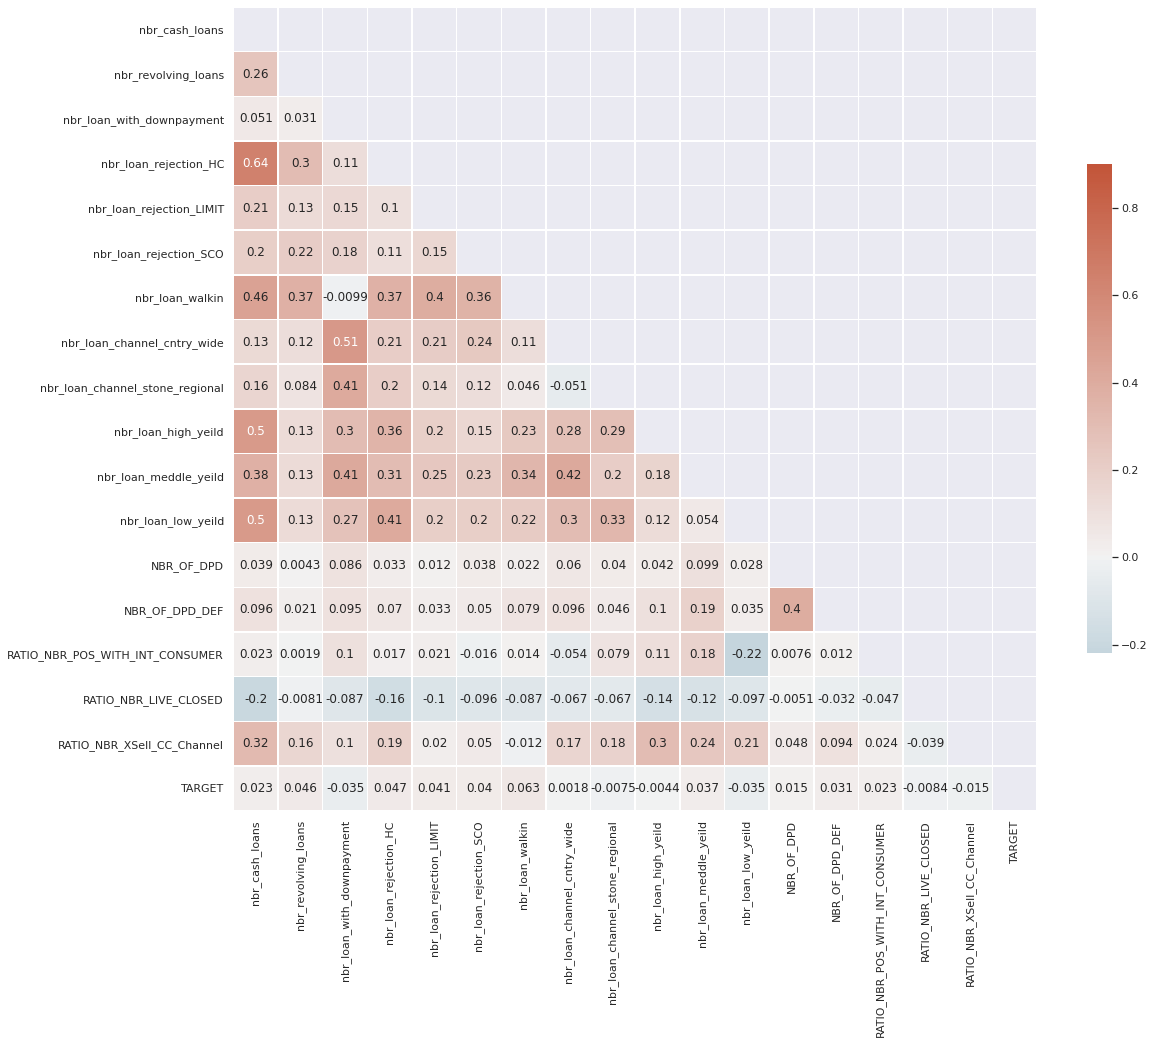

In [80]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application[total_nbr_variable].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

<AxesSubplot:>

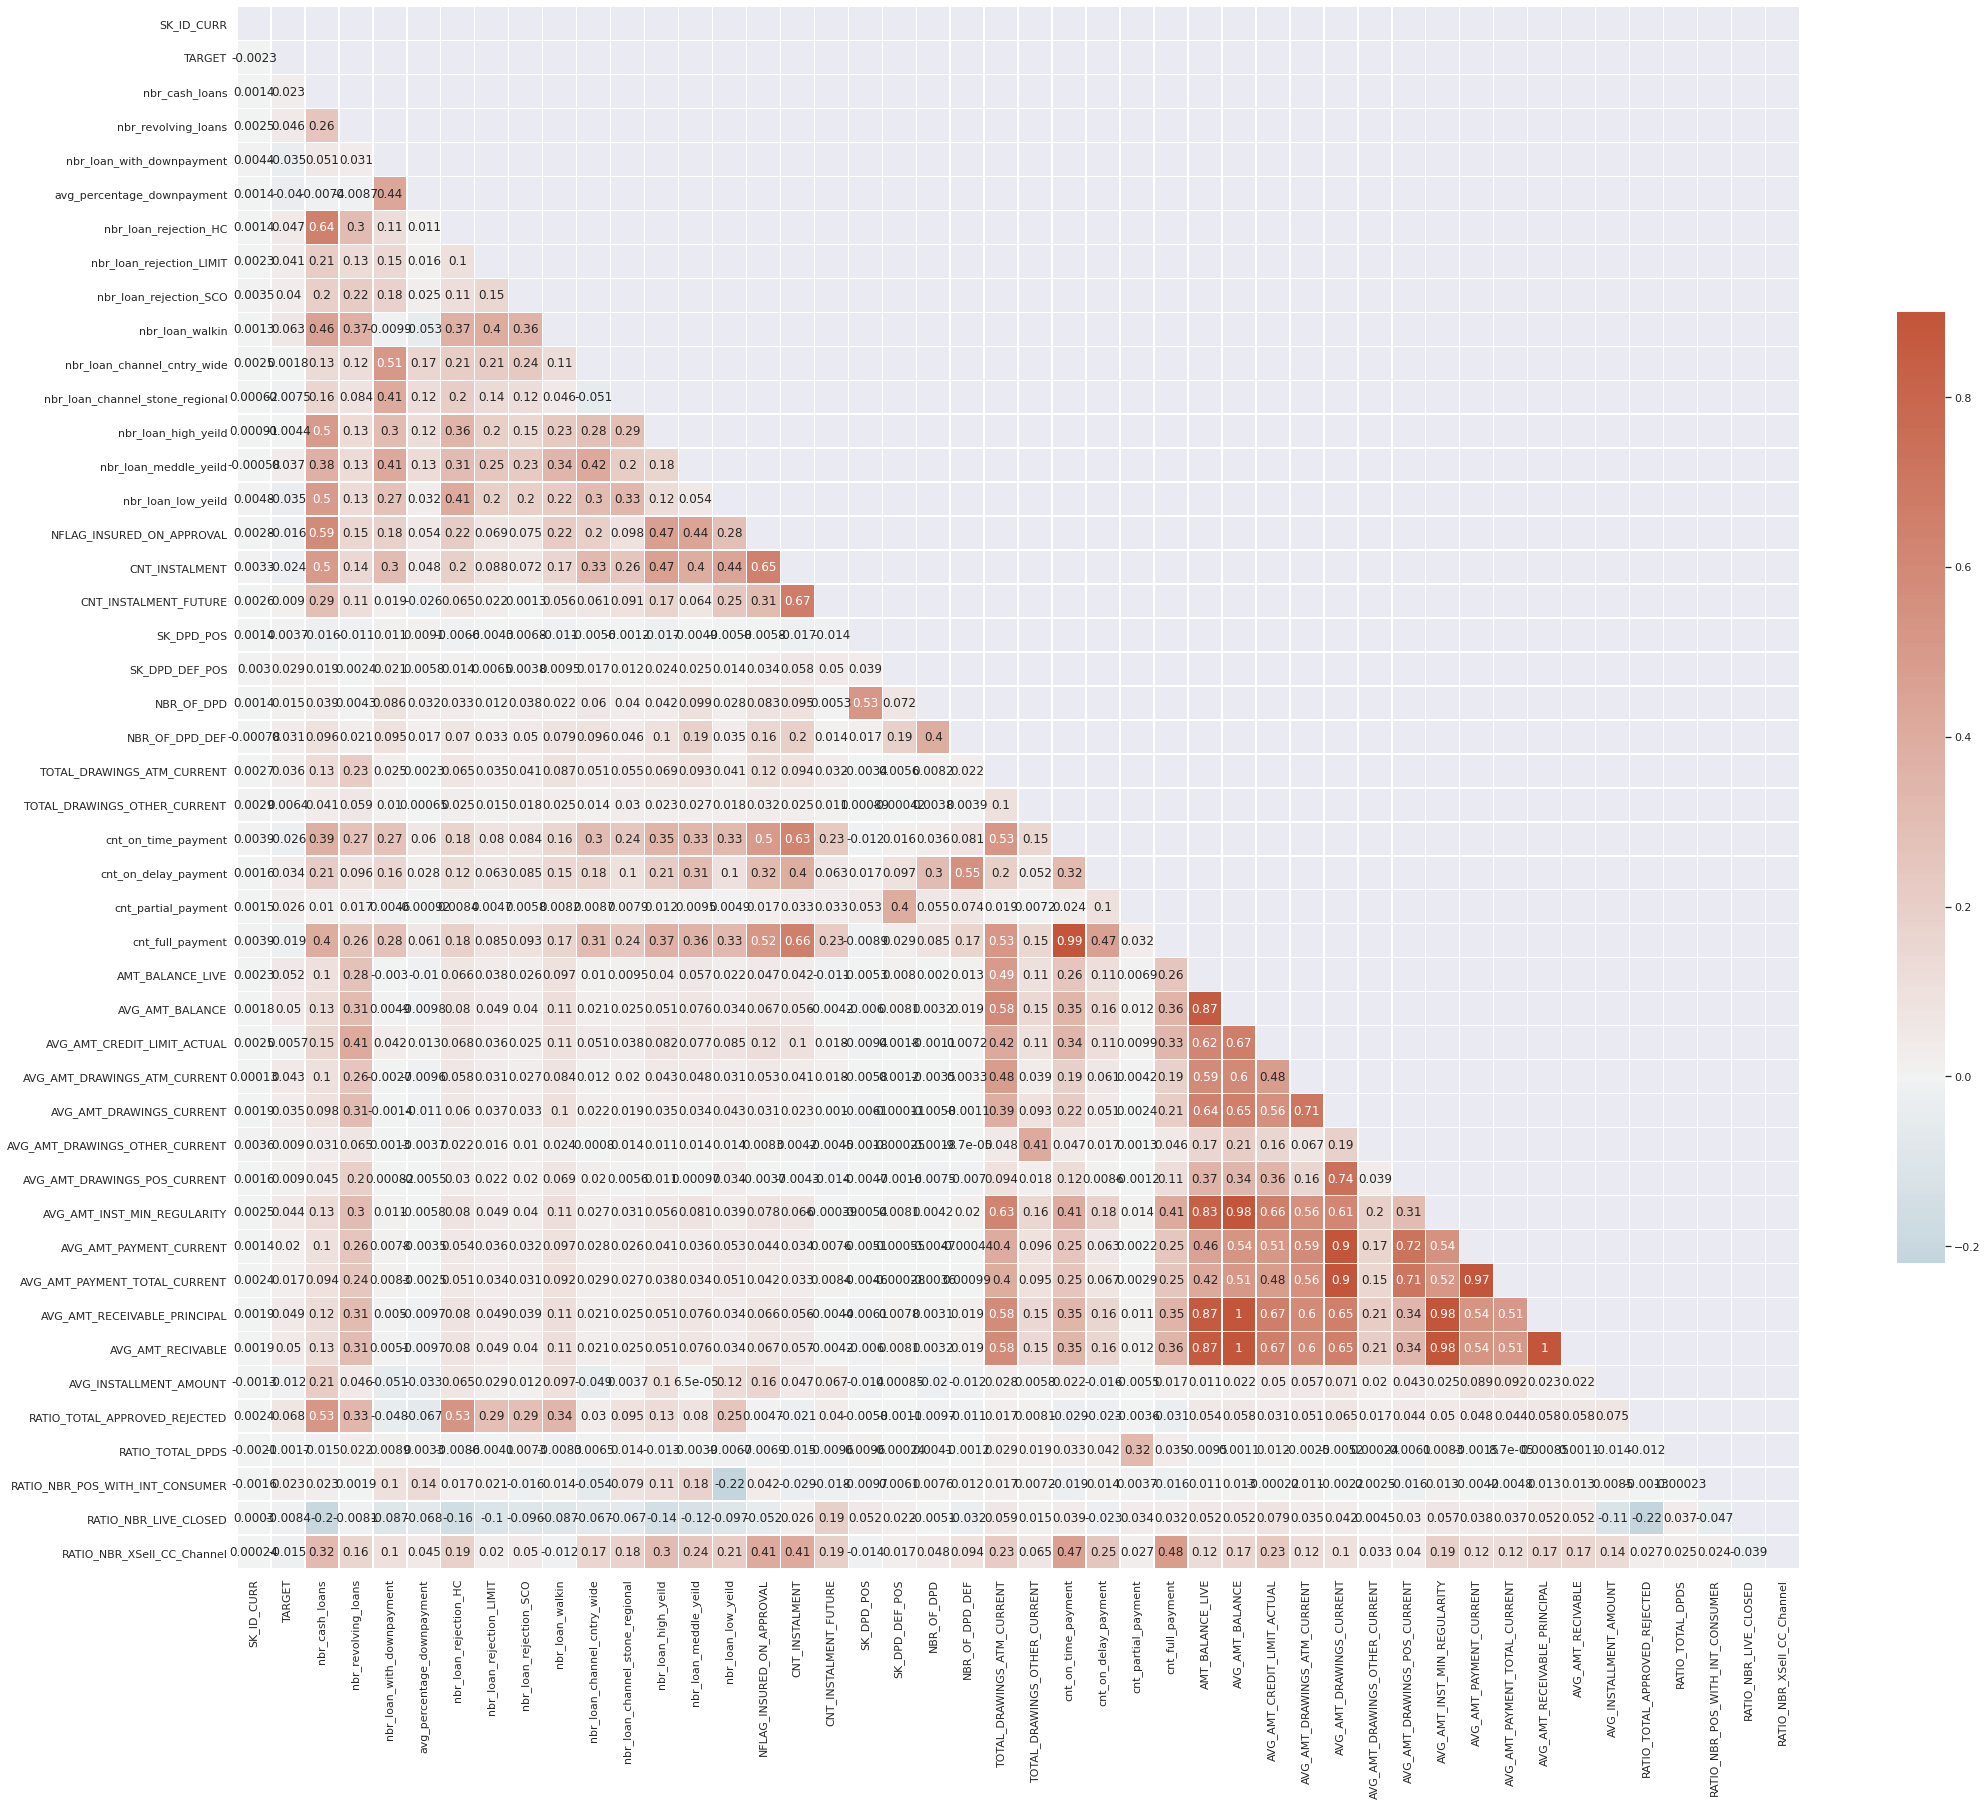

In [81]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(35, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [82]:
# Top 10 highly correlated variables
corr_dict = dict()
for col1 in prev_application.columns:
    for col2 in prev_application.columns:
        if col1 != col2:
            #print(col1, col2)
            corr_val = prev_application[col1].corr(prev_application[col2]).round(3)
            if col2 + " - "+ col1 not in list(corr_dict.keys()):
                corr_dict[col1 + " - "+ col2] = corr_val

In [83]:
sorted(corr_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse= True)  

[('nbr_loan_with_downpayment - nbr_loan_channel_cntry_wide', 0.51),
 ('nbr_cash_loans - cnt_full_payment', 0.397),
 ('SK_ID_CURR - nbr_loan_low_yeild', 0.005),
 ('SK_ID_CURR - nbr_loan_with_downpayment', 0.004),
 ('SK_ID_CURR - nbr_loan_rejection_SCO', 0.004),
 ('SK_ID_CURR - cnt_on_time_payment', 0.004),
 ('SK_ID_CURR - cnt_full_payment', 0.004),
 ('SK_ID_CURR - AVG_AMT_DRAWINGS_OTHER_CURRENT', 0.004),
 ('SK_ID_CURR - TOTAL_DRAWINGS_OTHER_CURRENT', 0.003),
 ('SK_ID_CURR - TOTAL_DRAWINGS_ATM_CURRENT', 0.003),
 ('SK_ID_CURR - SK_DPD_DEF_POS', 0.003),
 ('SK_ID_CURR - NFLAG_INSURED_ON_APPROVAL', 0.003),
 ('SK_ID_CURR - CNT_INSTALMENT_FUTURE', 0.003),
 ('SK_ID_CURR - CNT_INSTALMENT', 0.003),
 ('SK_ID_CURR - AVG_AMT_INST_MIN_REGULARITY', 0.003),
 ('SK_ID_CURR - AVG_AMT_CREDIT_LIMIT_ACTUAL', 0.003),
 ('SK_ID_CURR - nbr_revolving_loans', 0.002),
 ('SK_ID_CURR - nbr_loan_rejection_LIMIT', 0.002),
 ('SK_ID_CURR - nbr_loan_channel_cntry_wide', 0.002),
 ('SK_ID_CURR - cnt_on_delay_payment', 0.002

In [84]:
missing(prev_application)

,Total,Percent
RATIO_NBR_POS_WITH_INT_CONSUMER,22555,7.753257
RATIO_NBR_XSell_CC_Channel,0,0.000000
nbr_loan_channel_cntry_wide,0,0.000000
SK_DPD_DEF_POS,0,0.000000
SK_DPD_POS,0,0.000000
CNT_INSTALMENT_FUTURE,0,0.000000
CNT_INSTALMENT,0,0.000000
NFLAG_INSURED_ON_APPROVAL,0,0.000000
nbr_loan_low_yeild,0,0.000000
nbr_loan_meddle_yeild,0,0.000000


In [85]:
prev_application["RATIO_AVG_PAYMENT_DRAWING_CURRENT"] = prev_application.apply(lambda x: round(x["AVG_AMT_PAYMENT_CURRENT"]/x['AVG_AMT_DRAWINGS_CURRENT'],3), axis=1)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [86]:
prev_application["RATIO_AVG_AMT_MIN_PAY_CURRENT"] = prev_application.apply(lambda x: round(x["AVG_AMT_BALANCE"]/x['AVG_AMT_INST_MIN_REGULARITY'],3), axis=1)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [87]:
prev_application = prev_application.drop(['AVG_AMT_RECEIVABLE_PRINCIPAL', 'AVG_AMT_RECIVABLE',
                                          'AVG_AMT_PAYMENT_TOTAL_CURRENT','AVG_AMT_PAYMENT_TOTAL_CURRENT',
                                         'AVG_AMT_DRAWINGS_CURRENT', 'AVG_AMT_PAYMENT_CURRENT',
                                         'AVG_AMT_BALANCE', 'AVG_AMT_INST_MIN_REGULARITY',], axis=1)

In [88]:
total_avg_variable = [col for col in prev_application.columns if "avg" in col.lower()]
total_avg_variable.append("TARGET")
total_avg_variable

['avg_percentage_downpayment',
 'AVG_AMT_CREDIT_LIMIT_ACTUAL',
 'AVG_AMT_DRAWINGS_ATM_CURRENT',
 'AVG_AMT_DRAWINGS_OTHER_CURRENT',
 'AVG_AMT_DRAWINGS_POS_CURRENT',
 'AVG_INSTALLMENT_AMOUNT',
 'RATIO_AVG_PAYMENT_DRAWING_CURRENT',
 'RATIO_AVG_AMT_MIN_PAY_CURRENT',
 'TARGET']

<AxesSubplot:>

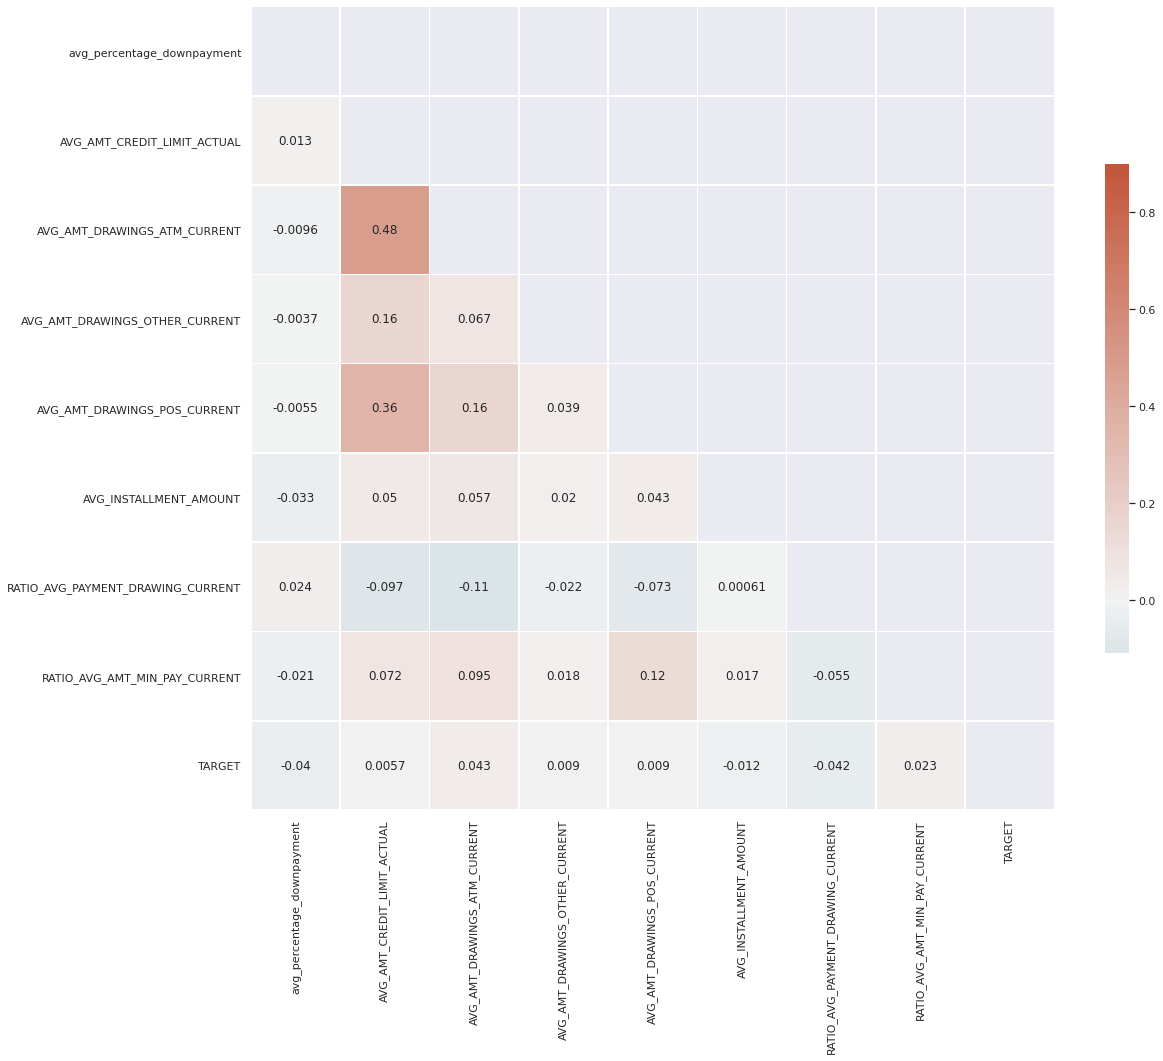

In [89]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application[total_avg_variable].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [90]:
prev_application.shape

(290910, 41)

<AxesSubplot:>

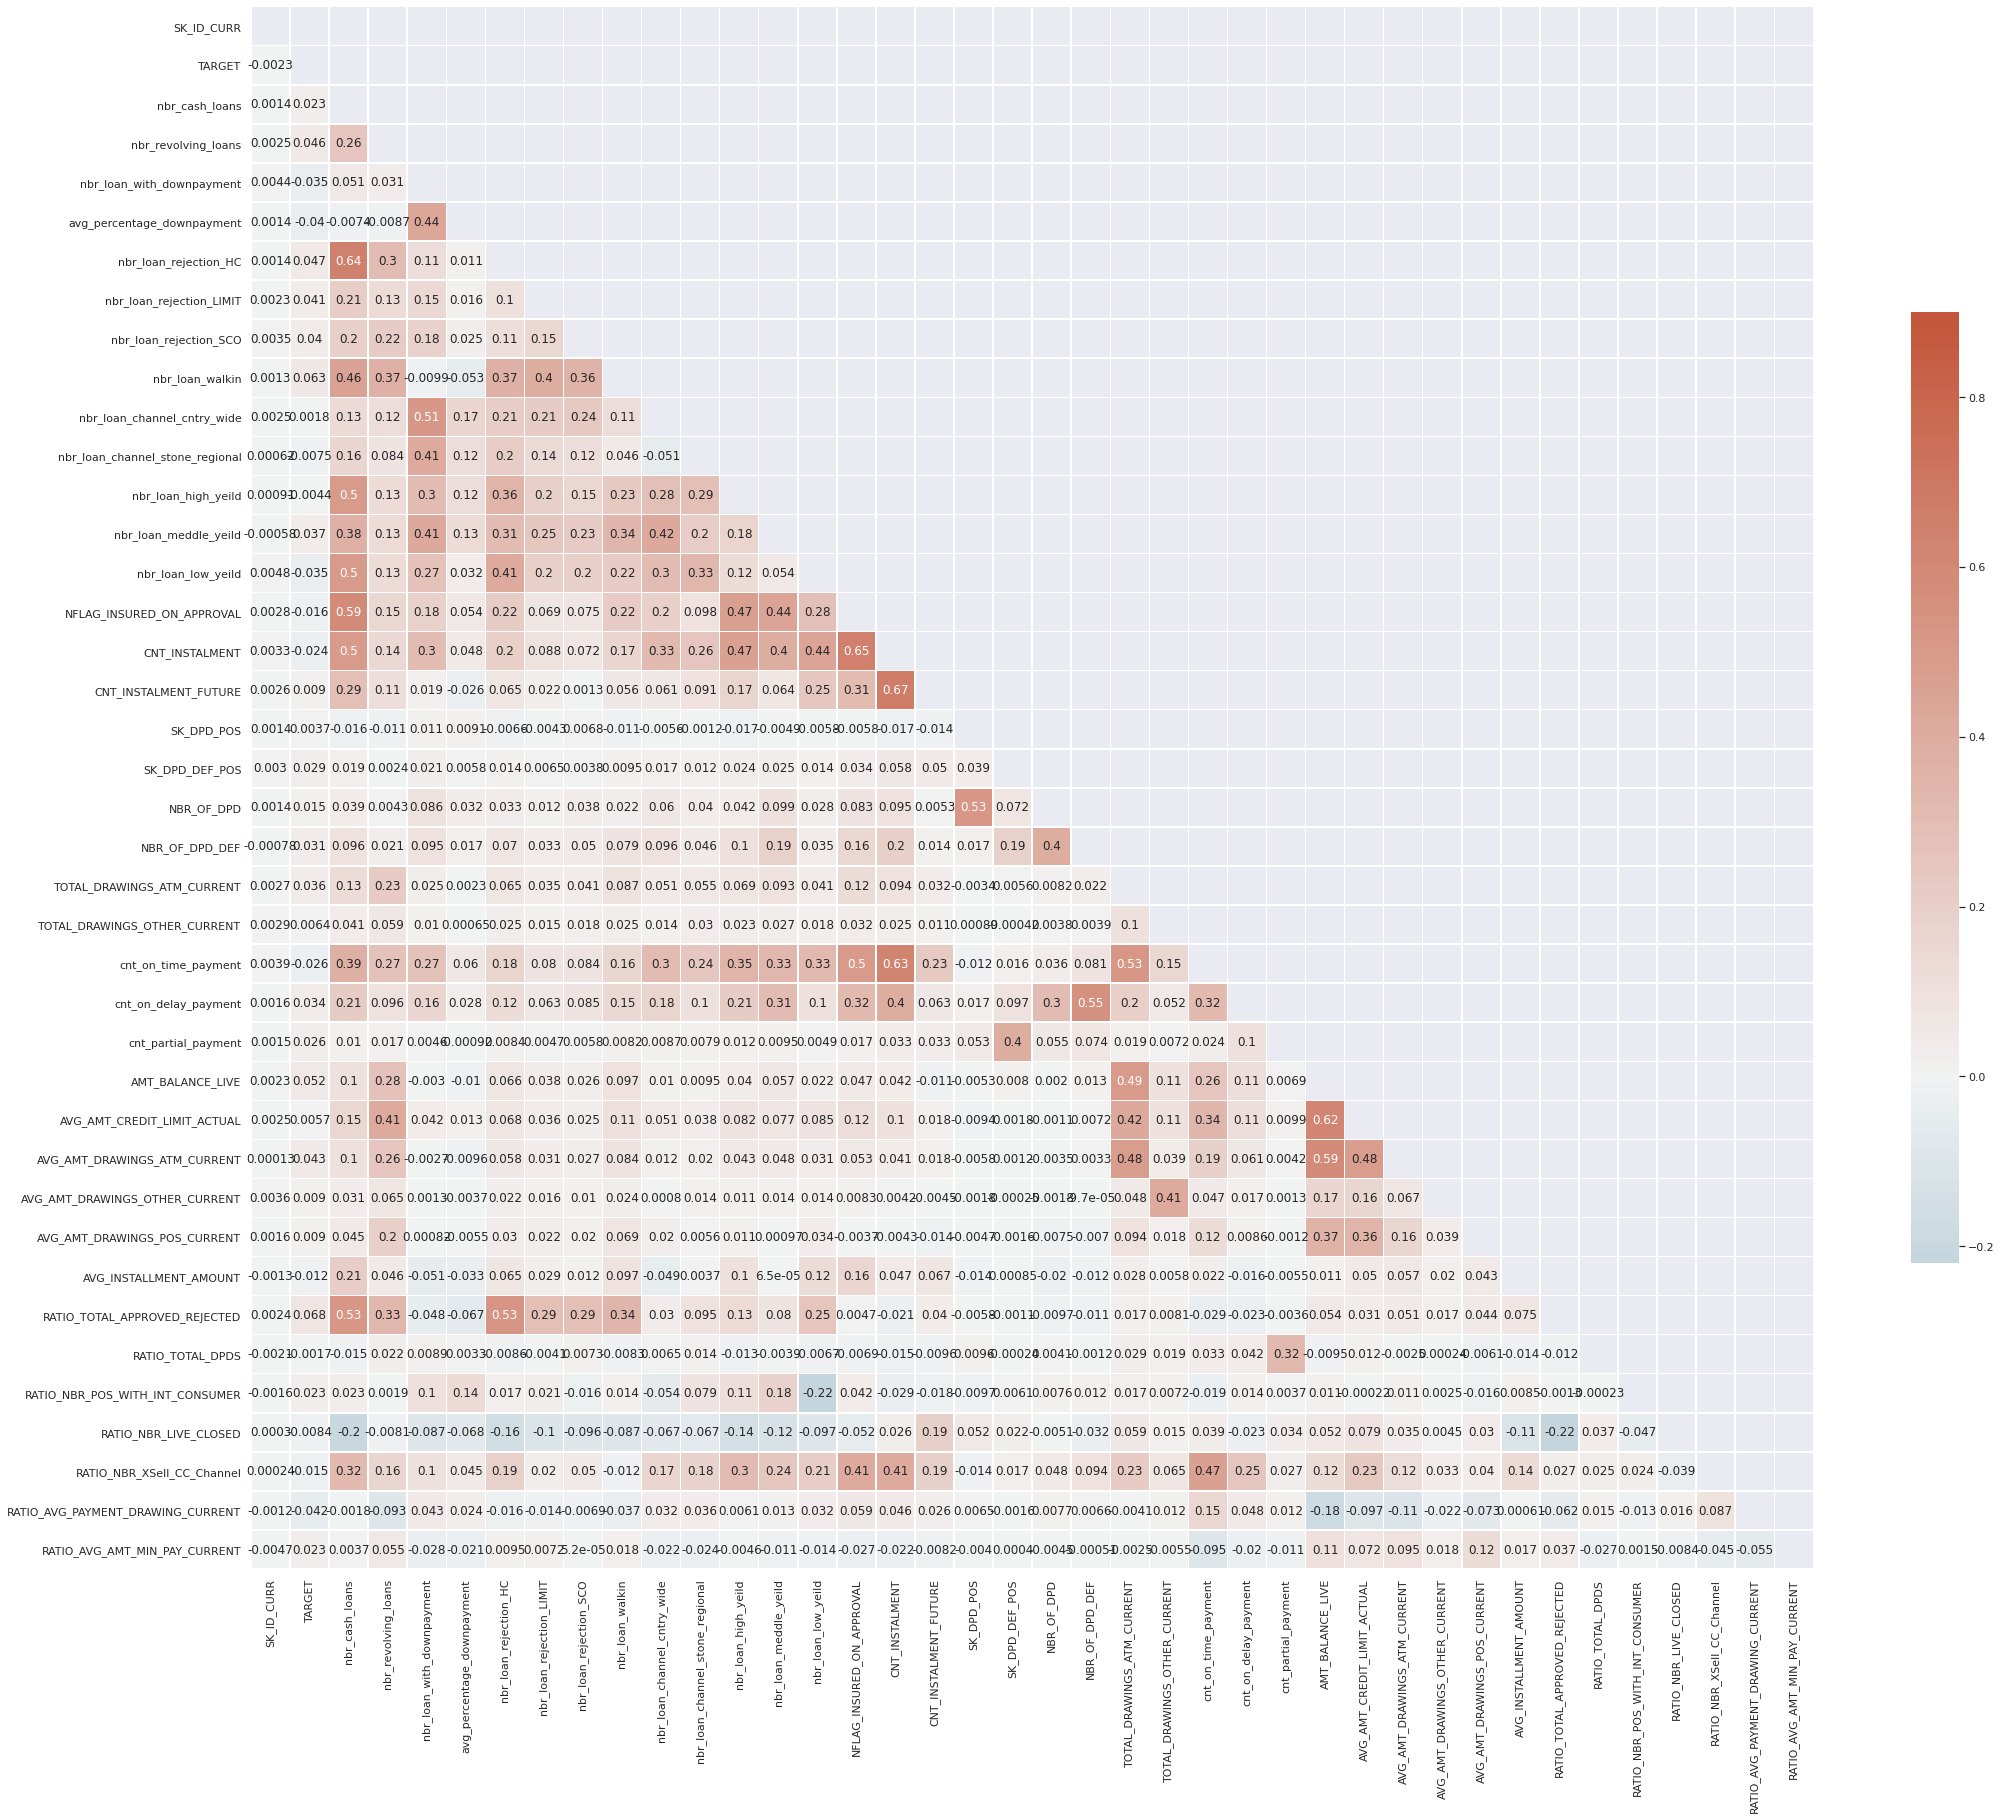

In [94]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = prev_application.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(35, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [92]:
prev_application = prev_application.drop('cnt_full_payment',axis=1)

In [93]:
prev_application.to_csv("Prepared_Data/previous_application.csv", index= False)